<a href="https://colab.research.google.com/github/WarpHero/AI_Training/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 첫 번째 신경망 훈련하기 : 기초적인 분류 문제
---
https://www.tensorflow.org/tutorials/keras/classification


In [1]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# helper 라이브러리를 임포트
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


- 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트 할 수 있음

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다:

train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트입니다.
test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트입니다.
이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:


class name을 따로 정해주는 이유 : class 값이 0-9의 숫자로 나와있기 때문에 나중에 표현을 하기 편하게 하기 위해 따로 정의해줌

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 데이터 탐색
- 모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다:

- 훈련 데이터 : 6만개
- 테스트 데이터 : 1만개
- 총 7만개 데이터


In [5]:
train_images.shape
# 2차원 이미지기 때문에 28x28로 표현

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(train_labels), len(test_labels)

(60000, 10000)

In [8]:
# 각 레이블은 0-9 사이의 정수
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names[train_labels[0]]
# 훈련 labels=9-> ankle boot 라는 의미

'Ankle boot'

## 데이터 전처리
- 네트워크 훈련 전에 데이터 전처리 해야 함.

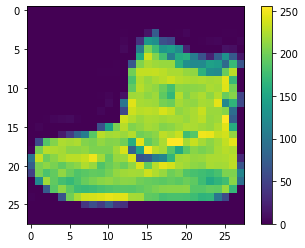

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


픽셀값의 범위가 0-255 사이라는 것을 알 수 있음
> 신경망 모델에 주입하기 전 이 값의 범위를 0-1 사이로 조정하려고 함
컴퓨터 입력값으로 만들 때는 normalize를 하게 됨 -> 255로 나눠주면 됨
>> 훈련 세트와 테스트 세트를 동일한 방식으로 전처리 해야 함

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

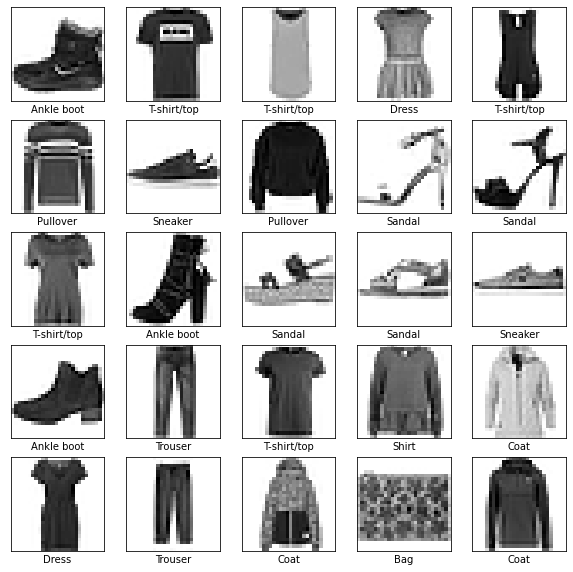

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델구성
신경망 모델을 만들기 위해 모델의 층을 구성한 다음 모델을 컴파일 함

### 총 설정
신경망의 기본 빌딩 블록은 레이어 입니다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

`tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

In [14]:
inputs=keras.Input(shape=(28, 28)) #input은 shaped을 28x28배열로 받는다
h=layers.Flatten()(inputs) # Flatten : 행렬곱을 위해 2차원 배열을 1차원 배열로 바꿔준다 -> layer의 shape이 1차원이 된다
h=layers.Dense(128)(h)
outputs=layers.Dense(10)(h) # 최종 값이 10개의 class로 분류한 모델이므로 출력이 10개가 돼야 함
outputs=layers.Activation('softmax')(outputs)

model=keras.Model(inputs=inputs, outputs=outputs)

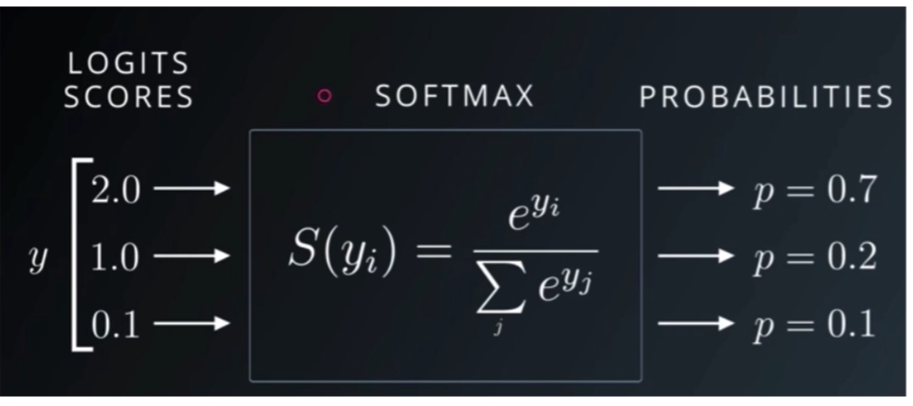

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 모델컴파일
모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됩니다.

- 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
- 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
- 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

Note: loss = `SparseCategoricalCrossentropy` 를 사용
linear regression이나 non-linear regression에서는 mse나 mae를 loss로 사용
분류를 하는 모델의 경우 SparseCategoricalCrossentropy 를 사용한다.

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련
신경망 모델을 훈련하려면 다음 단계가 필요합니다.

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.

훈련을 시작하려면 `model.fit` 메서드를 호출합니다. 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불립니다.

In [17]:
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1688/1688 [==============================] - 6s 3ms/step - loss: 0.5470 - accuracy: 0.8096 - val_loss: 0.4615 - val_accuracy: 0.8368
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4597 - accuracy: 0.8399 - val_loss: 0.4613 - val_accuracy: 0.8450
Epoch 3/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4414 - accuracy: 0.8461 - val_loss: 0.4547 - val_accuracy: 0.8422
Epoch 4/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4325 - accuracy: 0.8496 - val_loss: 0.4204 - val_accuracy: 0.8490
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4268 - accuracy: 0.8506 - val_loss: 0.4413 - val_accuracy: 0.8448


### 정확도 평가
- 테스트 세트에서 모델의 성능을 비교

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4737 - accuracy: 0.8355 - 422ms/epoch - 1ms/step

Test accuracy: 0.8355000019073486


### 예측만들기
- 훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있음


In [19]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
# 첫번째 그림에 대해서 어떻게 예측할 것인지 확인
predictions[0]

array([1.14734576e-07, 1.88583704e-09, 3.40074735e-07, 7.46218063e-07,
       6.56808425e-07, 1.30607724e-01, 1.15689886e-06, 5.85936271e-02,
       4.96656576e-04, 8.10298860e-01], dtype=float32)

- 출력 결과가 10가지(class 마다 결과 값을 가짐)
- 각 class 별 예측 점수
- 10개의 스코어 중 가장 높은 값은 구하려면 `numpy`의 `argmax`를 쓸 수 있다.

In [21]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠:

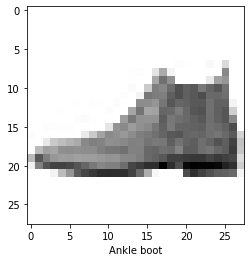

In [23]:
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[np.argmax(predictions[0])])
plt.show()